# Анализ гипотез и результатов A/B - теста для интернет-магазина

У нас есть данные о гипотезах, нацеленных на увеличение выручки интернет-магазина, и данные проведенного A/B-теста.

**Цель нашего исследования:** изучить полученные данные, провести анализ результатов и 

Для достижения поставленной цели мы выполним следующие задачи:

- приоритизируем гипотезы и укажем наиболее подходящие для проверки
    - [приоритизируем гипотезы с помощью фреймворка ICE ](#ice)
    - [приоритизируем гипотезы с помощью фреймворка RICE](#rice)
    - [выводы](#conclusion)
- проанализировать полученные результаты A/B-теста и сформулировать решение, основанное на полученных результатах
    - [посчитаем кумулятивную выручку по группам](#cumrevenue)
    - [посмотрим на кумулятивный средний чек по группам](#cumbill)
    - [изучим относительное изменение среднего чека группы B относительно группы A](#changebill)
    - [изучим кумулятивное количество заказов](#cumorders)
    - [посмотрим на относительное изменение кумулятивного количества заказов группы B относительно группы A](#changeorders)
    - [посчитаем количество заказов](#orders)
    - [посчитаем стоимость заказов](#revenue)
    - [проверим гипотезы](#hypothesys)
        -[гипотезу о равенстве количества заказов по группам](#equals)
        -[гипотезу о равенстве средних чеков по группам](#equalsbill)
        -[гипотезу о равенстве количества заказов по группам на "очищенных" данных](#equalsclean)
        -[гипотезу о равенстве средних чеков по группам на "очищенных" данных](#equalsbillclean)
- сделаем выводы



Загрузим все необходимые для работы библиотеки

In [22]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

## Гипотезы

Получим данные о гипотезах

In [25]:
pd.options.display.max_colwidth = 1

In [26]:
hypothesys = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypothesys

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


У нас есть девять различных гипотез для увеличения выручки интернет-магазина. У каждой гипотезы проставлены следующие параметры: `Reach`, `Impact`, `Confidence` и `Efforts`. Каждый параметр оценен и оценки стоят в пределах от 1 до 10 баллов. Таким образом, мы сможем применить к нашим данным фреймворки ICE и RICE для приоритизации.

###   Приоритизация с помощью фреймворка ICE <a id="ice"></a>

Применим к параметрам гипотез фреймворк ICE для получения оценки приоритета и отсортируем гипотезы в порядке убывания приоритета.

In [30]:
hypothesys['Ice'] = round(hypothesys['Impact'] * hypothesys.Confidence / hypothesys.Efforts,3)
print(hypothesys.sort_values(by='Ice', ascending=False))

                                                                                                     Hypothesis  \
8  Запустить акцию, дающую скидку на товар в день рождения                                                        
0  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей             
7  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок               
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию           
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1  Запустить собственную службу доставки, что сократит срок доставки заказов                                      
5  Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                       
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстр

При использовании фреймворка ICE наиболее перспективными выглядят 8, 0, 7 и 6  гипотезы.

###  Приоритизация с помощью фреймворка RICE <a id='rice'></a>

Применим к параметрам гипотез фреймворк RICE для получения оценки приоритета и отсортируем гипотезы в порядке убывания приоритета.

In [34]:
hypothesys['Rice'] = round(hypothesys.Reach * hypothesys.Impact * hypothesys.Confidence / hypothesys.Efforts,3)
display(hypothesys.sort_values(by='Rice', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,Ice,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000,3.0


А вот тут наиболее перспективными являются 7, 2, 0 и 6 гипотезы. 

### Выводы <a id='conclusion'></a>

В результате применения фрейморков ICE и RICE наиболее перспективными выглядят 7, 0 и 6 гипотезы, так как у них охват пользователей и уверенность в том, что эти гипотезы окажут сильное влияние на пользователей имеют очень высокие оценки.
Восьмая гипотеза уже не выглядит наиболее перспективной, так как охват пользователей будет наименьшим, хотя мы и уверены,что данная гипотеза окажет сильное влияние на пользователей.

## A/B-тест

Получим данные о проведенном тесте. Мы имеем два файла с данными о заказах пользователей и о количестве посетителей каждый день во время проведения теста.

In [40]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv', sep=',', parse_dates=['date'])
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [41]:
# создадим функцию, которая будет выводить нам основную информацию о данных,
# количестве пропусков и явных дубликатов в датафрейме
def get_info(df):
    print('Информация о данных:')
    df.info()
    print('Количество пропусков в данных:', df.isna().sum())
    print('Количество дубликатов в данных:', df.duplicated().sum())
    return

In [42]:
get_info(orders)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
Количество пропусков в данных: transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов в данных: 0


Данные о заказах содержат 1197 записей, содержащих следующую информацию: дата, id покупателя, id транзакции, сумма заказа и в какой группе теста находится наш покупатель.

Пропусков в данных нет, как и явных дубликатов.

Получим теперь данные о посетителях.

In [45]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv', sep=',',parse_dates=['date'])
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [56]:
get_info(visitors)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
Количество пропусков в данных: date        0
group       0
visitors    0
dtype: int64
Количество дубликатов в данных: 0


Данные о посетителях содержат 62 записи. Мы имеем данные о дате посещения и сколько человек в какой группе теста посетили сайт.

Пропусков в данных нет, явных дубликатов тоже нет.

Проверим, не задвоилась ли где-нибудь информация по дням и группе теста в данных о количестве посетителей.

In [60]:
visitors[['date','group']].value_counts()

date        group
2019-08-01  A        1
2019-08-24  A        1
2019-08-17  B        1
2019-08-18  A        1
            B        1
                    ..
2019-08-13  B        1
2019-08-14  A        1
            B        1
2019-08-15  A        1
2019-08-31  B        1
Name: count, Length: 62, dtype: int64

Видим, что данные не задвоены, и мы имеем информацию о количестве посетителей по каждой группе в каждый день лишь единожды. 

Проверим, что в данных о заказах каждый посетитель находится только в одной группе.  

In [64]:
print(f"Данные содержат информацию о {orders['visitorId'].nunique()} покупателях.")

Данные содержат информацию о 1031 покупателях.


In [66]:
# найдем пользователей в группе A
group_A = orders[orders['group'] == 'A']['visitorId'].unique()

# найдем пользователей в группе B
group_B = orders[orders['group'] == 'B']['visitorId'].unique()

# найдем пользователей, которые входят в обе группы
users_in_both_groups = set(group_A) & set(group_B)

print("Количество пользователей, которые входят в обе группы:", len(users_in_both_groups))

Количество пользователей, которые входят в обе группы: 58


Как видим, у нас есть 58 покупателей, которые почему-то попали и в группу A и в группу B.

Выведем данные об их заказах, чтобы убедиться, что они попали сразу в две группы.

In [113]:
orderAB = orders
for i in range(0, len(orders)):
    if orders.loc[i,'visitorId']  not in users_in_both_groups:
        orderAB = orderAB.drop(index = i)
orderAB.pivot_table(index='visitorId',columns='group', values='revenue', aggfunc='count')   

group,A,B
visitorId,,
8300375,1,1
199603092,4,1
232979603,1,1
237748145,4,1
276558944,1,1
351125977,1,1
393266494,1,2
457167155,1,3
471551937,1,1


In [ ]:
Как видим, каждый из этих пользователей совершил не менее одной покупки с каждой из групп.

In [115]:
print(f"Такие покупатели совершили {orderAB.shape[0]} покупку.")

Такие покупатели совершили 181 покупку.


Так как по правилам проведения теста, пользователь, попавший в одну из групп должен оставаться в ней до конца теста, то мы удалим данные о пользователях, попавших сразу в две группы, из `orders`.

In [118]:
# Удалить пользователей, которые входят в обе группы
orders_filtered = orders[~orders['visitorId'].isin(users_in_both_groups)]

In [120]:
orders_filtered.shape[0]

1016

### Кумулятивная выручка по группам<a id='cumrevenue'></a>

Посчитаем, как росла выручка магазина по группам.

In [126]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders_filtered[['date','group']].drop_duplicates()
dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [128]:
# получим кумулятивные данные о заказах  по дням
orders_aggregated = ( 
                  dates_groups
                   .apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], 
                                                                   orders_filtered['group'] == x['group'])]\
                   .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 
                         'revenue' : 'sum'}), axis=1)
                   .sort_values(by=['date','group'])
                  )
orders_aggregated.columns = ['date', 'group','orders','buyers','revenue']
orders_aggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Разделим получившуюся таблицу на две, отдельно для каждой группы теста.

In [131]:
orders_A = orders_aggregated[orders_aggregated['group']=='A']
orders_A.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,23,19,142779
175,2019-08-02,A,42,36,234381
291,2019-08-03,A,66,60,346854
499,2019-08-04,A,77,71,388030
719,2019-08-05,A,99,92,474413


In [133]:
orders_B = orders_aggregated[orders_aggregated['group']=='B']
orders_B.head()

,date,group,orders,buyers,revenue
66,2019-08-01,B,17,17,59758
173,2019-08-02,B,40,39,221801
383,2019-08-03,B,54,53,288850
498,2019-08-04,B,68,66,385740
699,2019-08-05,B,89,87,475648


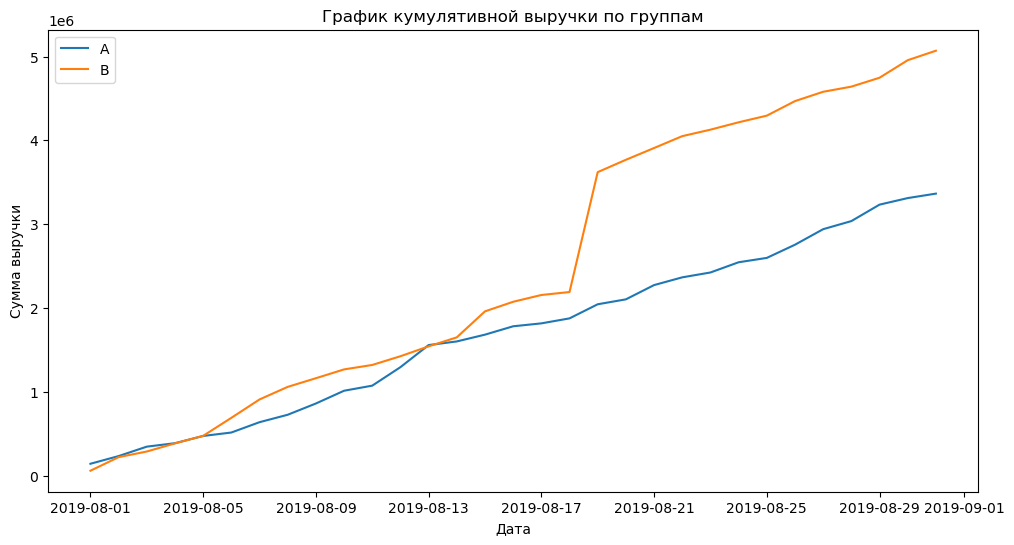

In [135]:
plt.figure(figsize=[12, 6])

# Строим график выручки группы А
plt.plot(orders_A['date'], orders_A['revenue'], label='A')

# Строим график выручки группы B
plt.plot(orders_B['date'], orders_B['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма выручки')
plt.legend();

Выручка группы A почти равномерно увеличивается в течение всего теста.
Однако график выручки группы B резко растет между 17 и 21 августа. Это может говорить нам о всплесках числа заказов, так и о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека<a id='cumbill'></a>

Построим графики кумулятивных средних чеков для обеих групп.

Средний чек определим как отношение суммы всех заказов на количество заказов.

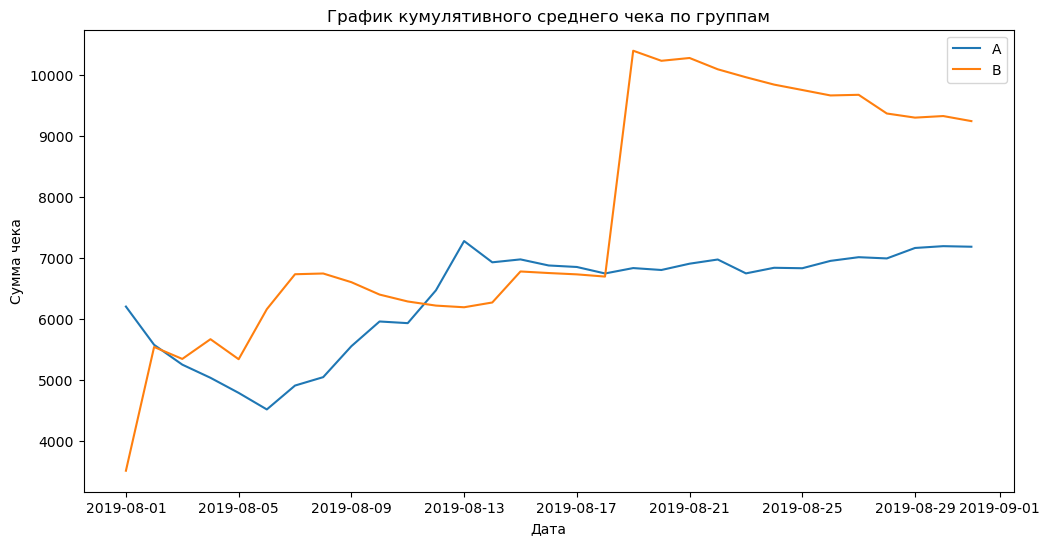

In [144]:
plt.figure(figsize=[12, 6])
plt.plot(orders_A['date'], orders_A['revenue']/orders_A['orders'], label='A')
plt.plot(orders_B['date'], orders_B['revenue']/orders_B['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма чека')
plt.legend();

Видим, что размер среднего чека для группы A с начала теста уменьшался, потом начал расти и практически установился к концу теста около 7000 рублей. В группе B средний чек несколь раз резко возрастал,особенно это видно в начале теста и после 17 августа, что также указывает на большие заказы. После 21 августа средний чек в группе B постепенно падает. 

таким образом можно сказать, что необходимо провести анализ выбросов.

### График относительного  изменения кумулятивного среднего чека группы B к группе A <a id='changebill'></a>

Посмотрим теперь как менялся средний чек в группе B относительно среднего чека группы A.

Объединим наши данные в один датафрейм так, чтобы у нас были данные в определенную дату по заказам как в группе A, так и в группе B. 

In [150]:
# собираем данные в одном датафрейме
merged_orders = orders_A.merge(orders_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_orders.head()

,date,groupA,ordersA,buyersA,revenueA,groupB,ordersB,buyersB,revenueB
0,2019-08-01,A,23,19,142779,B,17,17,59758
1,2019-08-02,A,42,36,234381,B,40,39,221801
2,2019-08-03,A,66,60,346854,B,54,53,288850
3,2019-08-04,A,77,71,388030,B,68,66,385740
4,2019-08-05,A,99,92,474413,B,89,87,475648


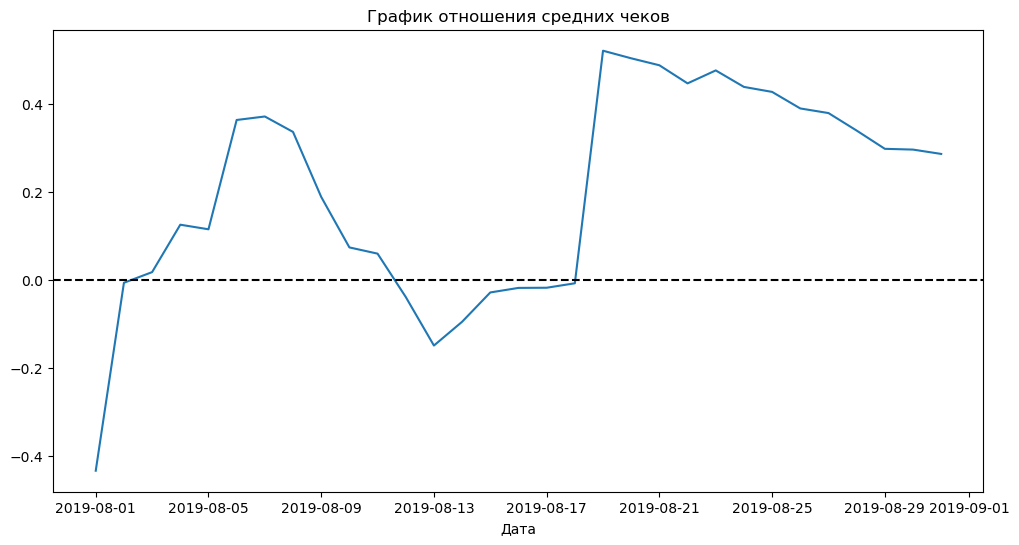

In [152]:
# построим график отношения средних чеков
plt.figure(figsize=[12, 6])
# cтроим отношение средних чеков
plt.plot(merged_orders['date'], 
         (merged_orders['revenueB']/merged_orders['ordersB'])/(merged_orders['revenueA']/merged_orders['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График отношения средних чеков')
plt.xlabel('Дата')
plt.ylabel('');


Мы видим, что  с одной стороны, график почти весь лежит в верхней полуплоскости, что означает, что кумулятивный средний чек группы B в время теста практически всегда был больше среднего чека группы A. Следовательно, можно сказать, что на первый взгляд группа B приносит больше выручки. Однако, график отношения средних чеков резко менялся несколько раз, значит, в эти даты были совершены большие заказы в обеих группах.

К конце теста график не стабилизировался, имеет тенденцию на уменьшение. Следовательно, можно сказать, что отношение средних чеков групп B и A к концу теста уменьшается и пока имеем, что чек в группе B пока примерно на 30% больше, чем в группе A. Но, как было сказано раньше, нужно проверить большие заказы.

### График кумулятивного среднего количества заказов на посетителя по группам<a id='cumorders'></a>

Посчитаем, сколько в среднем приходится заказов на посетителя в группах A и B.

Для этого посчитаем сколько посетителей интернет-магазина в каждой группе накопительно по дням

In [157]:
# получаем кумулятивные данные о посетителях интернет-магазина по дням
visitors_aggregated = (
                    dates_groups
                    .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                    )
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [159]:
# выделим данные по группам
visitors_A = visitors_aggregated[visitors_aggregated['group']=='A']
visitors_A.head()

,date,group,visitors
55,2019-08-01,A,719
175,2019-08-02,A,1338
291,2019-08-03,A,1845
499,2019-08-04,A,2562
719,2019-08-05,A,3318


In [161]:
visitors_B = visitors_aggregated[visitors_aggregated['group']=='B']
visitors_B.head()

,date,group,visitors
66,2019-08-01,B,713
173,2019-08-02,B,1294
383,2019-08-03,B,1803
498,2019-08-04,B,2573
699,2019-08-05,B,3280


In [163]:
# объединим данные по заказам и количестве посителей в один датафрейм
merged_data = (
                 merged_orders.merge(visitors_A, left_on='date',right_on='date', how='left')
                 .merge(visitors_B, left_on='date',right_on='date', how='left')
                )
merged_data.drop(['group_x','group_y'], axis=1, inplace=True)
merged_data.columns=['date', 'groupA','ordersA','buyersA','revenueA','groupB','ordersB','buyersB','revenueB','visitorsA','visitorsB']
                
merged_data.head()

,date,groupA,ordersA,buyersA,revenueA,groupB,ordersB,buyersB,revenueB,visitorsA,visitorsB
0,2019-08-01,A,23,19,142779,B,17,17,59758,719,713
1,2019-08-02,A,42,36,234381,B,40,39,221801,1338,1294
2,2019-08-03,A,66,60,346854,B,54,53,288850,1845,1803
3,2019-08-04,A,77,71,388030,B,68,66,385740,2562,2573
4,2019-08-05,A,99,92,474413,B,89,87,475648,3318,3280


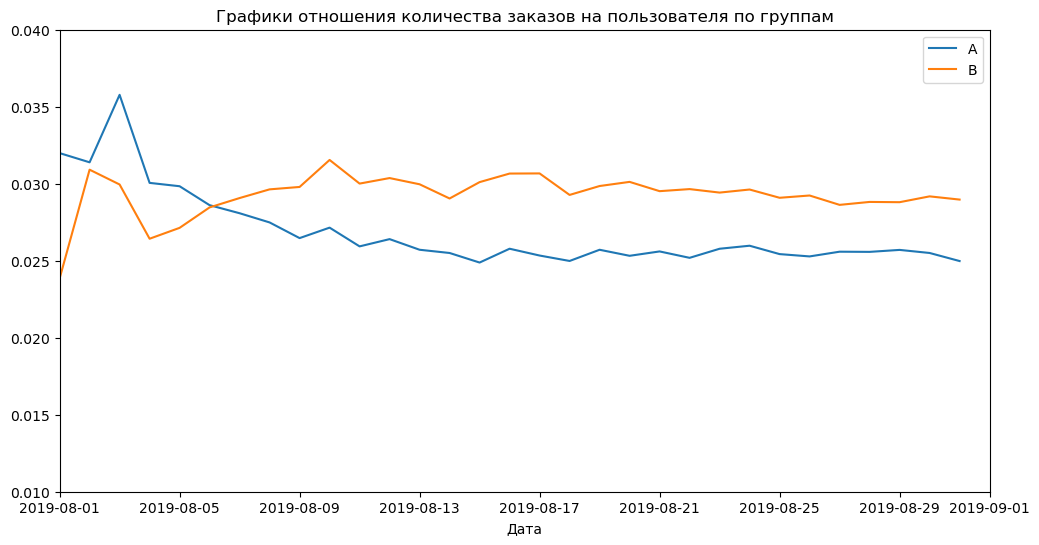

In [165]:
# считаем среднее количество заказов на посетителя
merged_data['conversionA'] = merged_data['ordersA']/merged_data['visitorsA']
merged_data['conversionB'] = merged_data['ordersB']/merged_data['visitorsB']

# строим графики
plt.figure(figsize=[12, 6])
plt.plot(merged_data['date'], merged_data['conversionA'], label='A')
plt.plot(merged_data['date'], merged_data['conversionB'], label='B')
plt.title('Графики отношения количества заказов на пользователя по группам')
plt.xlabel('Дата')
plt.ylabel('')
plt.legend();

# задаем масштаб осей
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,9,1), 0.01, 0.04]);

В начале теста в группе А количество заказов было больше, чем в группе B,  но уже после 5 августа конверсия заказов в группе B увеличилась и зафиксировалась около 3%. В группе A конверсия также установилась, но примерно 2,5%. 

### Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A <a id='changeorders'></a>

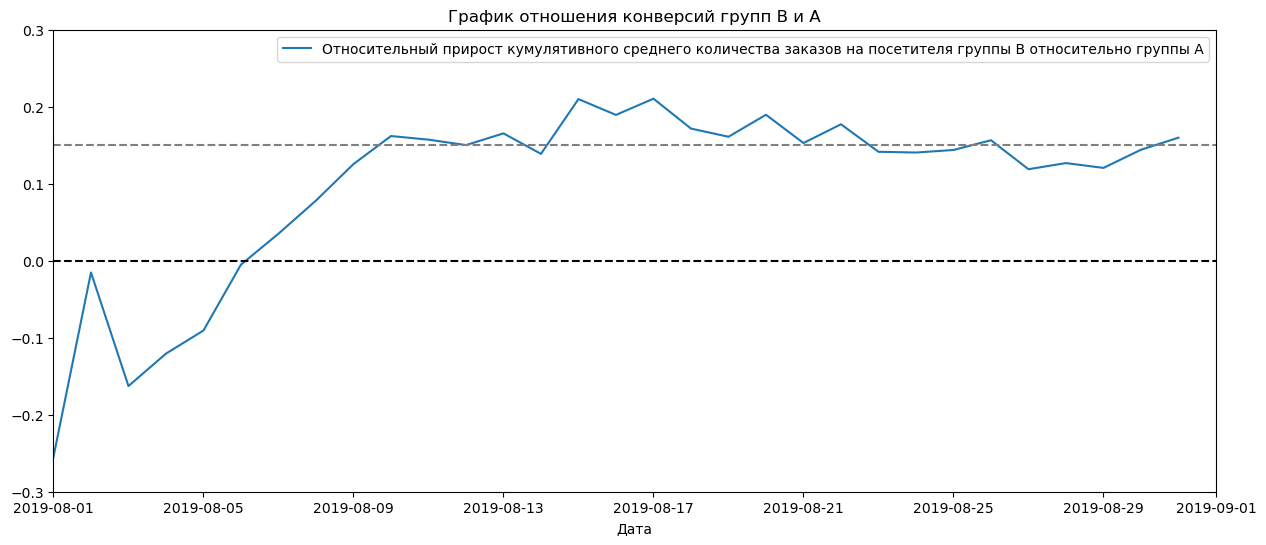

In [169]:
# построим график отношения конверсий групп B и A
plt.figure(figsize=[15, 6])
plt.plot(merged_data['date'], merged_data['conversionB']/merged_data['conversionA']-1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.title('График отношения конверсий групп B и A')
plt.xlabel('Дата')
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.3]);

Как видим, в начале теста группа B проигрывала группе A, но затем конверсия группы B выросла и колеблется около 15% прироста относительно группы A. В целом можно сказать, что отношение количества заказов на посетителя еще не установилось.

In [172]:
# объединим полученные данные в одной таблице 
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

print(cumulative_data.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


In [174]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


###  Количество заказов по пользователям <a id='orders'></a>

Для того, чтобы понять, какое количество заказов считать аномальным, сначала посмотрим, сколько заказов делают покупатели.

In [178]:
orders_by_users = (
    orders_filtered.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

     visitor_id  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


Мы видим, что несколько пользователей совершали 3 заказа, остальные меньше. 

Чтобы лучше понимать соотношение количества заказов, отобразим на графике сколько заказов совершали пользователи

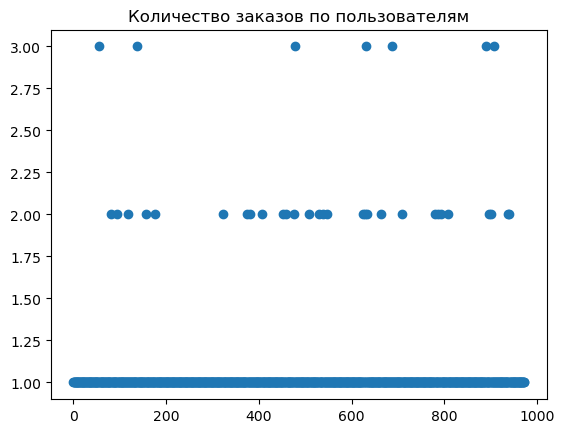

In [181]:
# задаем количество точек на графике
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Количество заказов по пользователям');

Видно, что большинство пользователей совершило только один заказ, два и более заказов совершали несколько пользователей.
Возможно, эти пользователи могли повлиять на конверсию.

Посчитаем 95-й и 99-й перцентиль, чтобы узнать какой процент пользователей совершают больше двух заказов.

In [184]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 


[1. 2.]


Получаем, что не более 5% пользователей оформляли больше одного заказа, и не более 1% - оформили больше двух заказов.
Таким образом, будем считать аномальными пользователей, совершивших три заказа. Тем самым мы отбросим не более 1% пользователей.

Теперь посмотрим на стоимость заказов определим какие заказы будем считать аномальными.

###  Стоимость заказов по пользователям<a id='revenue'></a>

Оценим стоимость заказов по пользователям с помощью графика

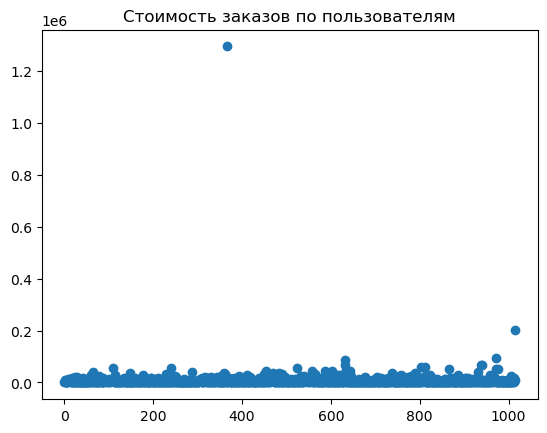

In [190]:
x_values = pd.Series(range(0,len(orders_filtered)))

plt.scatter(x_values, orders_filtered['revenue']) 
plt.title('Стоимость заказов по пользователям');

Видим, что есть несколько дорогих заказов. Большинство заказов не очень дорогие. Чтобы понять какие заказы будем считать аномальными, посчитаем перцентили.

In [193]:
print(np.percentile(orders_filtered['revenue'], [95, 99]))

[26785. 53904.]


Получили, что не более 5% пользователей совершили заказы на сумму больше 26785 рублей, и не более 1%  - на сумму больше 53904 рубля.

Будем считать аномальными заказы, чья стоимость превысила 30000 рублей, тогда мы отбросим от 1% до 5% заказов.

### Проверка гипотез<a id='hypothesis'></a>

Для того, чтобы принять решение о результатах теста, мы должны проверить есть ли различия между полученными данными в группах. Для работы интернет-магазина важными параметрами являются количество заказов и средний чек.

Сначала проверим гипотезы о том, есть ли отличия по группам по так называемым "сырым" данным, мы не будем отбрасывать аномальные значения.

#### Гипотеза о равенстве среднего числа заказов по группам<a id='equals'></a>

Проверим есть статистически подтвержденная разница в количестве заказов по группам.

Сформулируем две гипотезы

H0: различия в среднем количестве заказов между группами нет;

H1: Различия в среднем количестве заказов между группами есть.

Применим непараметрический тест Уилкоксона-Манна-Уитни.

Для этого соберем следующие данные в один датафрейм: дата, количество заказов, сумма заказа и количество посетителей за день в каждой группе, а также  кумулятивные эти значения. 

In [202]:
# посчитаем количество посетителей сайта в день в группе A
visitors_daily_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_A.columns = ['date', 'visitors_per_date_A']
visitors_daily_A.head()

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [204]:
# теперь тоже самое для группы B
visitors_daily_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_B.columns = ['date', 'visitors_per_date_B']
visitors_daily_B.head()

,date,visitors_per_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [206]:
# считаем количество заказов и сумму заказов за день в группе A
orders_A_daily = (
    orders_filtered[orders_filtered['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']
orders_A_daily.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


In [208]:
# считаем количество заказов и сумму заказов за день в группе B
orders_B_daily = (
    orders_filtered[orders_filtered['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']
orders_B_daily.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


In [210]:
# соберем кумулятивные данные по группе A
cumulative_data_A = merged_data[['date','ordersA','revenueA','visitorsA']]
cumulative_data_A.columns = ['date','orders_cumulative_A','revenue_cumulative_A','visitors_cumulative_A']
cumulative_data_A.head()

,date,orders_cumulative_A,revenue_cumulative_A,visitors_cumulative_A
0,2019-08-01,23,142779,719
1,2019-08-02,42,234381,1338
2,2019-08-03,66,346854,1845
3,2019-08-04,77,388030,2562
4,2019-08-05,99,474413,3318


In [212]:
# соберем кумулятивные данные по группе B
cumulative_data_B = merged_data[['date','ordersB','revenueB','visitorsB']]
cumulative_data_B.columns = ['date','orders_cumulative_B','revenue_cumulative_B','visitors_cumulative_B']
cumulative_data_B.head()

,date,orders_cumulative_B,revenue_cumulative_B,visitors_cumulative_B
0,2019-08-01,17,59758,713
1,2019-08-02,40,221801,1294
2,2019-08-03,54,288850,1803
3,2019-08-04,68,385740,2573
4,2019-08-05,89,475648,3280


In [214]:
# собираем все данные в один датафрейм
data = (
        visitors_daily_A
        .merge(visitors_daily_B,on='date',how='left')
        .merge(orders_A_daily, on='date',how='left')
        .merge(orders_B_daily, on='date',how='left')
        .merge(cumulative_data_A, on='date', how='left')
        .merge(cumulative_data_B,on='date',how='left')        
        )
data.head()

,date,visitors_per_date_A,visitors_per_date_B,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cumulative_A,revenue_cumulative_A,visitors_cumulative_A,orders_cumulative_B,revenue_cumulative_B,visitors_cumulative_B
0,2019-08-01,719,713,23,142779,17,59758,23,142779,719,17,59758,713
1,2019-08-02,619,581,19,91602,23,162043,42,234381,1338,40,221801,1294
2,2019-08-03,507,509,24,112473,14,67049,66,346854,1845,54,288850,1803
3,2019-08-04,717,770,11,41176,14,96890,77,388030,2562,68,385740,2573
4,2019-08-05,756,707,22,86383,21,89908,99,474413,3318,89,475648,3280


Создадим переменные orders_by_users_A и orders_by_users_B со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [217]:
orders_by_users_A = (
    orders_filtered[orders_filtered['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitor_id', 'orders']
orders_by_users_A.head()

,visitor_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [219]:
orders_by_users_B = (
    orders_filtered[orders_filtered['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitor_id', 'orders']
orders_by_users_B.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1


Создадим переменные `sample_A` и `sample_B`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Переменные `sample` состоят из двух частей:
- Список с количеством заказов для каждого из пользователей
- Нули для пользователей, которые ничего не заказывали. 

In [222]:
sample_A = pd.concat([orders_by_users_A['orders'],
         pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')],
                    axis=0)
sample_A.sample(5)

15589    0
4164     0
5576     0
2743     0
16204    0
Name: orders, dtype: int64

In [224]:
sample_B = pd.concat([orders_by_users_B['orders'],
         pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')],
                    axis=0)
sample_B.sample(5)

7771    0
5056    0
182     0
6817    0
270     0
Name: orders, dtype: int64

Зададим уровень значимости alpha = 0.05

Применим критерий Уилкоксона-Манна-Уитни.

In [228]:
print('p-value равно:',"{0:.5f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))

p-value равно: 0.01102


p-value значительно меньше 0.05, следовательно, мы отвергаем гипотезу о том, что различий в средних заказах по группам нет.

Посчитаем относительный прирост среднего числа заказов в группе B относительно группы A.

In [231]:
print('Относительное изменение среднего числа заказов группы B относительно группы A:',
      "{0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

Относительное изменение среднего числа заказов группы B относительно группы A: 0.160


Видим, что относительный прирост среднего числа заказов группы B относительно группы A составляет 16%, что подтверждает наши выводы по графику.


#### Гипотеза о равенстве средних чеков по группам<a id='equalsbill'></a>

Теперь проверим гипотезу о равенстве средних чеков по группам:

H0: разницы в средних чеках по группам нет

H1: разница в средних чеках по группам есть

In [236]:
print('p-value равно:',
      '{0:.3f}'.format(stats.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], 
                                          orders_filtered[orders_filtered['group']=='B']['revenue'])[1]))

p-value равно: 0.829


p-value больше 0.05, следовательно, у нас нет оснований отвергнуть гипотезу о том, что различий между средними чеками в группах нет.

In [239]:
print('Относительные различия в средних чеках по группам:',
      '{0:.3f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].mean()/
                       orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1))

Относительные различия в средних чеках по группам: 0.287


Средний чек группы B на 28,7% больше, чем в группе A (аналогичное поведение мы видели на графике). Вероятно, что аномальные заказы в группе B влияют на средний чек.

Проверим наши гипотезы на очищенных данных.

#### Гипотеза о равенстве количества заказов по группам по "очищенным" данным<a id='equalsclean'></a>

Примем за аномальных пользователей тех, кто совершил 3 заказа, или совершил заказ на сумму свыше 30 000 рублей. Таким образом мы убираем 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [245]:
# получим список пользователей, совершивших 3 заказа
users_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > 2]['visitor_id'],
        orders_by_users_B[orders_by_users_B['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
users_many_orders.head()

58     611059232 
211    2108163459
310    2988190573
409    3908431265
416    3967698036
Name: visitor_id, dtype: int64

In [247]:
# получим список пользователей, совершивших заказы дороже 30000 рублей
users_expensive_orders = orders_filtered[orders_filtered['revenue'] > 30000]['visitorId']
users_expensive_orders.head()

77     787824685 
78     3288820196
131    2254586615
173    2953427180
208    3118156181
Name: visitorId, dtype: int64

In [249]:
# объединим полученные списки
abnormal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head()

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64

In [251]:
print('Число пользователей с аномальными заказами:', abnormal_users.shape[0])

Число пользователей с аномальными заказами: 49


Получили, что у нас есть 49 пользователей, которые совершили или больше двух заказов или заказы дороже 30000 руб.

Узнаем как их действия повлияли на результаты теста. Получим "очищенные" данные.

In [254]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем две гипотезы

H0: различия в среднем количестве заказов между группами на основе "очищенных" данных нет;

H1: Различия в среднем количестве заказов между группами на основе "очищенных" данных есть.

In [259]:
print('p-value равно:','{0:.5f}'.format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

p-value равно: 0.00971


p-value значительно меньше 0.05, следовательно, мы отвергаем гипотезу о том, что различий в средних заказах по группам нет.

Посчитаем относительный прирост среднего числа заказов в группе B относительно группы A.

In [264]:
print('Относительное изменение среднего числа заказов:','{0:.3f}'.format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

Относительное изменение среднего числа заказов: 0.187


На основе "очищенных" данных видим, что относительное изменение среднего числа заказов группы B относительно группы A немного выросло и составляет 18,7%

#### Гипотеза о равенстве средних чеков по группам на основе "очищенных" данных<a id='equalsbillclean'></a>

Теперь проверим гипотезу о равенстве средних чеков по группам:

H0: разницы в средних чеках по группам на основе "очищенных" данных нет

H1: разница в средних чеках по группам на основе "очищенных" данных есть

In [269]:
print('p-value равно:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_filtered[
                np.logical_and(
                    orders_filtered['group'] == 'A',
                    np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders_filtered[
                np.logical_and(
                    orders_filtered['group'] == 'B',
                    np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие средних чеков по группам:',
    "{0:.3f}".format(
        orders_filtered[
            np.logical_and(
                orders_filtered['group'] == 'B',
                np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders_filtered[
            np.logical_and(
                orders_filtered['group'] == 'A',
                np.logical_not(orders_filtered['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value равно: 0.741
Относительное различие средних чеков по группам: -0.027


Гипотезу о том,что нет различия между группами,у нас нет оснований отвергнуть, но по очищенным данным мы видим, что сумма среднего чека в группе B оказывается даже меньше, чем в группе A.

## Выводы

Перед нами была поставлена задача проверить гипотезы и установить их приоритет.
В результате применения фрейморков ICE и RICE наиболее перспективными выглядят 7, 0 и 6 гипотезы, так как у них охват пользователей и уверенность в том, что эти гипотезы окажут сильное влияние на пользователей имеют очень высокие оценки. 

После приоритизации гипотез мы провели A/B-тест и исследовали полученные результаты.

В ходе работы было выявлено наличие пользователей, которые попадали как в первую, так и во вторую группу. Такое положение противоречит условиям проведения теста, поэтому было принято решение удалить из результатов теста заказы этих пользователей.

В результате проведенного нами исследования мы определили, что выручка группы A почти равномерно увеличивается в течение всего теста. Однако график выручки группы B резко растет между 17 и 21 августа. Это может говорить нам как о всплесках числа заказов, так и о появлении очень дорогих заказов в выборке.

Размер среднего чека для группы A с начала теста уменьшался, потом начал расти и практически установился к концу теста около 7000 рублей. В группе B средний чек несколь раз резко возрастал, особенно это видно в начале теста и после 17 августа, что также указывает на большие заказы. После 21 августа средний чек в группе B постепенно падает.

Кумулятивный средний чек группы B во время теста практически всегда был больше среднего чека группы A. Следовательно, можно сказать, что на первый взгляд группа B приносит больше выручки. Однако, график отношения средних чеков резко менялся несколько раз, значит, в эти даты были совершены большие заказы в обеих группах. К концу теста график не стабилизировался, имеет тенденцию на уменьшение. Следовательно, можно сказать, что отношение средних чеков групп B и A к концу теста уменьшается и пока имеем, что чек в группе B пока примерно на 30% больше, чем в группе A. 

В начале теста в группе А количество заказов было больше, чем в группе B, но уже после 5 августа конверсия заказов в группе B увеличилась и зафиксировалась около 3%. В группе A конверсия также установилась, но примерно 2,5%. Конверсия группы B колеблется около 15% прироста относительно группы A.

Мы приняли за аномальных пользователей тех, кто совершил 3 заказа, или совершил заказ на сумму свыше 30 000 рублей. Таким образом мы убираем 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью. Таких у нас получилось 49 пользователей. Мы исключили их данные из расчета.

В результате проверки гипотез мы получили, что есть статистическое различие в средних заказах по группам как по "сырым", так и по "очищенным" данным. При этом прирост количества заказов в группе B относительно группы A составляет 16-19%.

Проверяя гипотезу о равенстве средних чеков, мы получили, что не можем отклонить данную гипотезу ни на основе "сырых" данных, ни на основе "очищенных". При этом прирост среднего чека группы B относительно группы A после того, как убрали аномальные заказы снизился с 28,7% до -2.7%, что говорит о том, что прироста нет и на основе очищенных данных сумма среднего чека стала даже меньше.

Исходя из полученных данных, мы можем принять решение остановить тест, признав его успешным для группы B, так как мы получили увеличение количества заказов на 16-19%, сохранив при этом средний чек. Тем самым мы увеличили выручку магазина.